In [5]:
#輸入程式庫

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
import openpyxl
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [7]:
data =  pd.read_csv('problem1.csv')
data.head()

,yield,debt,total,roa,class
0,0.00,98.08,-9.82,-8.98,1
1,0.00,97.38,4.36,0.41,1
2,0.00,97.38,4.36,0.41,1
3,1.46,96.89,4.49,0.48,2
4,0.00,96.78,28.52,-0.78,1


In [8]:
print(data)

      yield   debt  total    roa  class
0      0.00  98.08  -9.82  -8.98      1
1      0.00  97.38   4.36   0.41      1
2      0.00  97.38   4.36   0.41      1
3      1.46  96.89   4.49   0.48      2
4      0.00  96.78  28.52  -0.78      1
...     ...    ...    ...    ...    ...
2211   0.00   2.01  -1.53  -3.18      1
2212   0.00   1.46  -7.73  -6.69      1
2213   0.00   1.38  16.50 -21.32      1
2214   0.00   0.96  -4.27  -4.04      1
2215   0.66   0.76  23.69  25.20      1

[2216 rows x 5 columns]


In [9]:
totalsample=data.shape[0]
print(totalsample)

2216


In [10]:
X = data.iloc[:,0:4].values
Y = data['class'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.25,random_state = 0)
X_traino=X_train
X_testo=X_test
Y_traino=Y_train
Y_testo=Y_test

In [11]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [12]:
clf = GaussianNB(var_smoothing=0.0000001)
clf.fit(X_train,Y_train)

GaussianNB(var_smoothing=1e-07)

In [24]:
y_pred = clf.predict(X_test)
y_proba=clf.predict_proba(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[9.99218645e-01 7.81355012e-04 1.12220881e-11 4.70756702e-28
  5.63365072e-66 1.12978261e-15]
 [1.96215455e-03 9.98016461e-01 2.13844949e-05 1.38777120e-17
  6.39832555e-46 8.71133902e-12]
 [2.64184309e-56 2.79306922e-04 9.79051661e-01 2.06686378e-02
  2.09395249e-12 3.93912816e-07]
 ...
 [3.02600395e-22 7.81920045e-01 2.18079905e-01 4.89013855e-08
  2.59949471e-26 1.81942787e-09]
 [4.26548428e-23 7.21621630e-01 2.78378243e-01 1.19631643e-07
  4.16596895e-25 6.90841363e-09]
 [6.24435016e-30 2.45491889e-01 7.54504110e-01 3.99427562e-06
  4.47141398e-22 6.50220815e-09]]
[[160  10   0   0   0   0]
 [  1 150   4   0   0   0]
 [  0   4 129   4   0   0]
 [  0   1   0  65   3   0]
 [  0   0   0   0  14   1]
 [  0   0   0   0   0   8]]


In [14]:
print(clf.score(X_test,Y_test))

0.9494584837545126


In [15]:
from sklearn.metrics import classification_report
model_report=classification_report(Y_test,y_pred)
print(model_report)

              precision    recall  f1-score   support

           1       0.99      0.94      0.97       170
           2       0.91      0.97      0.94       155
           3       0.97      0.94      0.96       137
           4       0.94      0.94      0.94        69
           5       0.82      0.93      0.88        15
           6       0.89      1.00      0.94         8

    accuracy                           0.95       554
   macro avg       0.92      0.95      0.94       554
weighted avg       0.95      0.95      0.95       554



0.9954114480835147


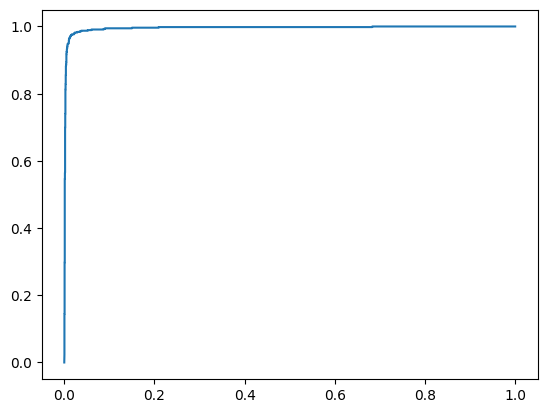

In [34]:
from sklearn.preprocessing import label_binarize
y_true_binarized=label_binarize(Y_test,classes=[1,2,3,4,5,6])
n_classes=y_true_binarized.shape[1]
fpr=dict()
tpr=dict()

roc_auc=dict()
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_true_binarized[:,i],np.array(y_proba)[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

fpr["micro"],tpr["micro"],_=roc_curve(y_true_binarized.ravel(),np.array(y_proba).ravel())
roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])

print(roc_auc["micro"])
plt.plot(fpr["micro"],tpr["micro"])
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred3=knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm3 = confusion_matrix(Y_test, y_pred3)
print(cm3)

[[161   9   0   0   0   0]
 [  2 150   3   0   0   0]
 [  0   8 123   6   0   0]
 [  1   0   3  61   4   0]
 [  0   0   0   5  10   0]
 [  0   0   0   2   1   5]]


In [45]:
import sklearn.neural_network 
neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(6,), activation='relu',alpha=1.e-5,solver='adam')
neural_network.fit(X_train, Y_train) 
y_pred10 = neural_network.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(Y_test, y_pred10)
from sklearn.metrics import roc_curve, auc
print(cm10)

[[167   3   0   0   0   0]
 [  3 149   3   0   0   0]
 [  0   6 131   0   0   0]
 [  0   0   3  66   0   0]
 [  0   0   0  15   0   0]
 [  0   0   0   5   3   0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
